### AI/ML Project: Predicting Student's Academic Performance Based on Student's Actions

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # For saving the model

In [3]:
# Load the dataset
df = pd.read_csv('student_habits_performance.csv')  

# Display first 5 rows
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
# Create performance column based on exam_score (Pass if >= 60)
df['performance'] = df['exam_score'].apply(lambda x: 'Pass' if x >= 60 else 'Fail')

In [6]:
df = df.drop('student_id', axis = 1)

In [7]:
# Automatically detect categorical (object) columns
categorical_cols = df.select_dtypes(include='object').columns

# Loop to print unique values
for col in categorical_cols:
    print(f"Unique values in '{col}': {df[col].unique()}\n")


Unique values in 'gender': ['Female' 'Male' 'Other']

Unique values in 'part_time_job': ['No' 'Yes']

Unique values in 'diet_quality': ['Fair' 'Good' 'Poor']

Unique values in 'parental_education_level': ['Master' 'High School' 'Bachelor' nan]

Unique values in 'internet_quality': ['Average' 'Poor' 'Good']

Unique values in 'extracurricular_participation': ['Yes' 'No']

Unique values in 'performance': ['Fail' 'Pass']



In [8]:
# Encode categorical features
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,performance
0,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,8,1,56.2,0
1,20,0,6.9,2.8,2.3,0,97.3,4.6,1,6,1,0,8,0,100.0,1
2,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,1,0,34.3,0
3,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,1,1,26.8,0
4,19,0,5.0,4.4,0.5,0,90.9,4.9,0,3,2,1,1,0,66.4,1


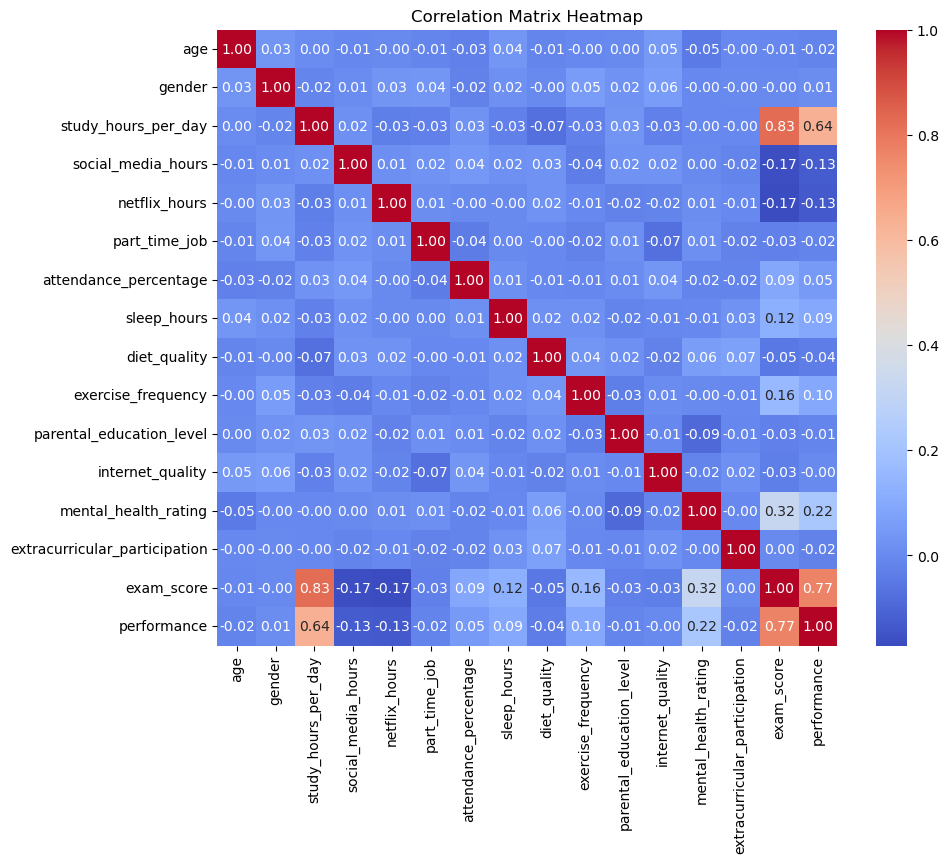

In [9]:
# Compute correlation matrix (only numeric columns)
corr = df.corr()

# Set plot size
plt.figure(figsize=(10, 8))

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:
# Manually Select only student's actions that can influence academic performance as features (X) and performance as label (y)
X = df[[
    'study_hours_per_day',
    'social_media_hours',
    'netflix_hours',
    'part_time_job',
    'attendance_percentage',
    'sleep_hours',
    'diet_quality',
    'exercise_frequency',
    'extracurricular_participation'
]]
y = df['performance']
print(X.shape)
print(y.shape)

(1000, 9)
(1000,)


In [11]:
X.head()

,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,extracurricular_participation
0,0.0,1.2,1.1,0,85.0,8.0,0,6,1
1,6.9,2.8,2.3,0,97.3,4.6,1,6,0
2,1.4,3.1,1.3,0,94.8,8.0,2,1,0
3,1.0,3.9,1.0,0,71.0,9.2,2,4,1
4,5.0,4.4,0.5,0,90.9,4.9,0,3,0


In [12]:
# Split the dataset into training and testing data using 20% of the dataset as test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(800, 9)
(200, 9)
(800,)
(200,)


In [13]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train

array([[-1.04978529,  0.6126009 ,  1.81300907, ...,  1.67186796,
         1.45627597,  1.44940512],
       [ 1.91518641,  1.46938539, -0.2938096 , ..., -0.99778148,
        -1.52458742, -0.68993823],
       [-0.71285669, -0.50121892, -0.20220879, ...,  0.33704324,
         0.46265484, -0.68993823],
       ...,
       [ 0.02838623,  1.21235004,  2.17941232, ...,  1.67186796,
        -1.02777685,  1.44940512],
       [-1.04978529, -2.12910944,  1.17180339, ...,  0.33704324,
         1.45627597,  1.44940512],
       [ 0.50008628,  1.29802849, -0.93501529, ..., -0.99778148,
        -1.52458742, -0.68993823]])

In [15]:
# Build Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Predictions
y_pred = model.predict(X_test)

In [17]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.89

Confusion Matrix:
 [[ 42   9]
 [ 13 136]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79        51
           1       0.94      0.91      0.93       149

    accuracy                           0.89       200
   macro avg       0.85      0.87      0.86       200
weighted avg       0.89      0.89      0.89       200



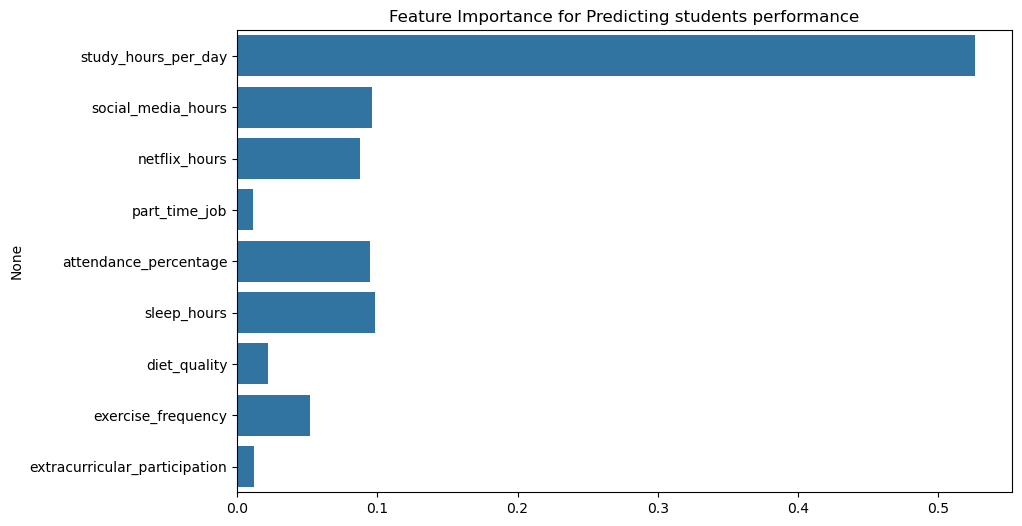

In [18]:
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance for Predicting students performance')
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.885
[[ 41  10]
 [ 13 136]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        51
           1       0.93      0.91      0.92       149

    accuracy                           0.89       200
   macro avg       0.85      0.86      0.85       200
weighted avg       0.89      0.89      0.89       200



In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.84
[[ 32  19]
 [ 13 136]]
              precision    recall  f1-score   support

           0       0.71      0.63      0.67        51
           1       0.88      0.91      0.89       149

    accuracy                           0.84       200
   macro avg       0.79      0.77      0.78       200
weighted avg       0.84      0.84      0.84       200



In [21]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9
[[ 40  11]
 [  9 140]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        51
           1       0.93      0.94      0.93       149

    accuracy                           0.90       200
   macro avg       0.87      0.86      0.87       200
weighted avg       0.90      0.90      0.90       200



In [22]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.875
[[ 42   9]
 [ 16 133]]
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        51
           1       0.94      0.89      0.91       149

    accuracy                           0.88       200
   macro avg       0.83      0.86      0.84       200
weighted avg       0.88      0.88      0.88       200



In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store results
results = []

# List of tuples (Model Name, Model Object)
models = [
    ('Random Forest', model),
    ('Logistic Regression', log_model),
    ('KNN', knn_model),
    ('SVM', svm_model),
    ('XGBoost', xgb_model)
]

# Evaluate each model
for name, clf in models:
    y_pred = clf.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label=1),
        'Recall': recall_score(y_test, y_pred, pos_label=1),
        'F1-Score': f1_score(y_test, y_pred, pos_label=1)
    })

# Create results DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='F1-Score', ascending=False))


                 Model  Accuracy  Precision    Recall  F1-Score
3                  SVM     0.900   0.927152  0.939597  0.933333
0        Random Forest     0.890   0.937931  0.912752  0.925170
1  Logistic Regression     0.885   0.931507  0.912752  0.922034
4              XGBoost     0.875   0.936620  0.892617  0.914089
2                  KNN     0.840   0.877419  0.912752  0.894737


In [24]:
joblib.dump(svm_model, 'best_academic_performance_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']